In [1]:
## IMPORT RELEVENT LIBRARIES

In [56]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
## LOAD THE DATA

In [57]:
data = pd.read_csv('1.04.+Real-life+example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [58]:
## PREPROCESS THE DATA

In [59]:
data_preprocessed = data.drop(['Brand'],axis=1)

In [60]:
data_preprocessed.describe(include = 'all')

,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,NaN,6,NaN,NaN,4,2,NaN,312
top,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [61]:
## REMOVE MISSING VALUES

In [62]:
data_preprocessed.isnull().sum()

Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [63]:
data_no_mv = data_preprocessed.dropna(axis=0)
data_no_mv

,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...
4339,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [64]:
data_no_mv.describe(include = 'all')

,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,NaN,6,NaN,NaN,4,2,NaN,306
top,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,NaN,6,NaN,NaN,4,2,NaN,302
top,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


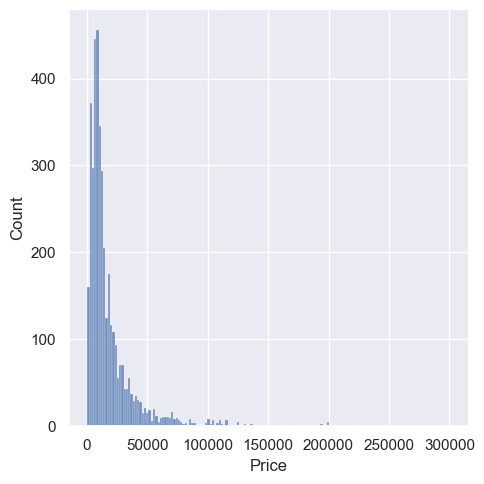

In [265]:
sns.displot(data_no_mv['Price'])
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

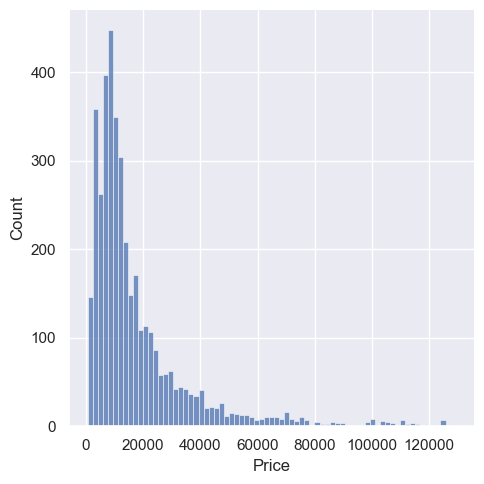

In [264]:
sns.displot(data_1['Price'])

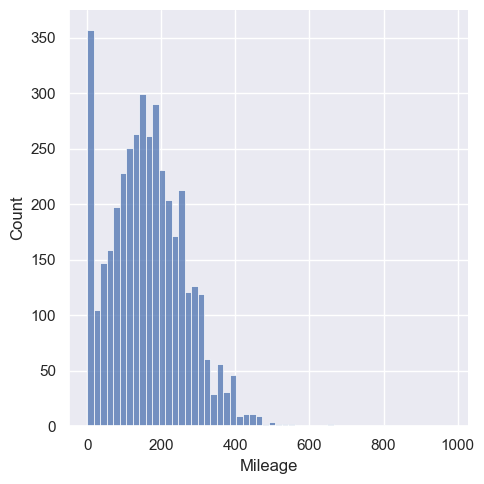

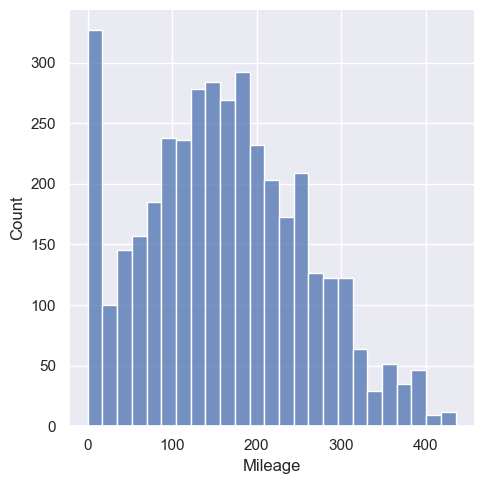

In [66]:
sns.displot(data_no_mv['Mileage'])
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.displot(data_2['Mileage'])

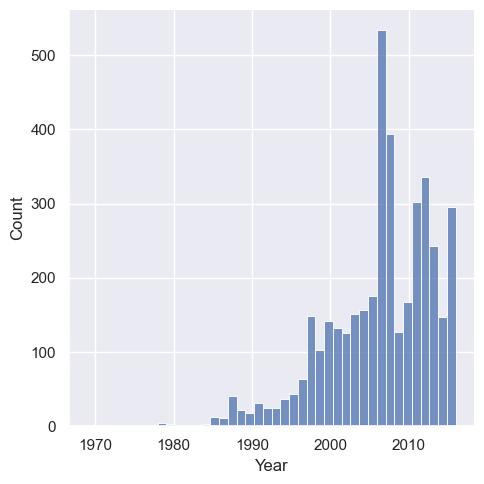

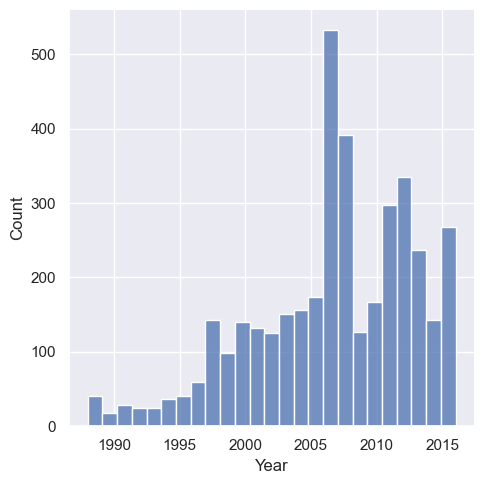

In [67]:
sns.displot(data_no_mv['Year'])
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]
sns.displot(data_3['Year'])

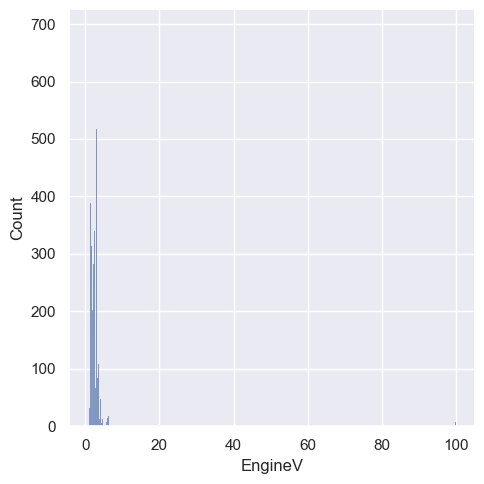

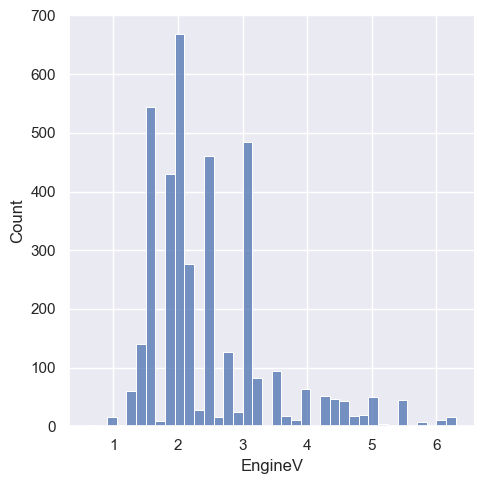

In [68]:
sns.displot(data_no_mv['EngineV'])
data_4 = data_3[data_3['EngineV']<6.5]
sns.displot(data_4['EngineV'])

In [69]:
data_cleaned = data_4.reset_index(drop = True)
data_cleaned.describe(include = 'all')

,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,NaN,6,NaN,NaN,4,2,NaN,291
top,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


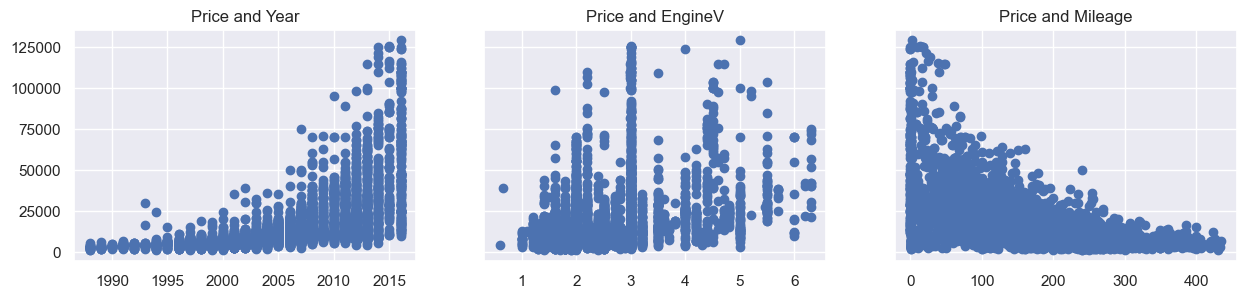

In [70]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

In [71]:
data_cleaned.columns.values

array(['Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'], dtype=object)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [73]:

data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True,dtype=int)
data_with_dummies.head()

,Price,Mileage,EngineV,Year,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1999,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,2003,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Year', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       '

In [75]:
cols = ['Price', 'Mileage', 'EngineV', 'Year', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Price,Mileage,EngineV,Year,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1999,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,2003,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
y = data_preprocessed['Price']
x = data_preprocessed.drop(['Price'],axis = 1)
from sklearn.feature_selection import f_regression
f_regression(x, y)

(array([1.71241199e+03, 7.06154642e+02, 1.86764804e+03, 4.96509132e+01,
        8.86576014e-03, 5.07293356e+01, 7.55188036e+01, 7.12332838e+01,
        5.84184927e+01, 3.27826502e+00, 2.42504518e-02, 2.27162520e+02,
        8.45209221e+00, 7.37995383e-01, 1.92327060e-01, 2.88040659e-01,
        5.92857532e-01, 1.35320506e+00, 2.48889395e+00, 2.15364619e+00,
        9.63597271e-01, 5.48654580e-01, 1.17010904e+00, 8.11886501e-01,
        4.35496291e-01, 6.59179108e-01, 2.82284362e+00, 1.01518861e+01,
        9.63256242e+00, 3.81922673e-01, 1.53405382e-01, 2.25525329e-01,
        1.30978989e+00, 3.22437399e-02, 3.18123136e+00, 1.02342450e+00,
        1.55635190e+00, 1.14658785e+00, 3.52445862e+00, 9.41989000e-01,
        1.29187474e+00, 6.42352969e-01, 1.97601268e+01, 1.97886980e+00,
        5.52955564e+00, 1.50958470e+00, 2.16764331e+00, 9.31611356e-04,
        2.08563530e+01, 1.24965410e+01, 5.08907170e-02, 3.59338982e+01,
        9.25701488e-02, 3.97571056e-02, 1.02594264e+00, 1.840671

In [251]:
p_values = f_regression(x,y)[1]
p_values

array([3.54535010e-310, 4.78205791e-143, 0.00000000e+000, 2.16513187e-012,
       9.24988397e-001, 1.25855846e-012, 5.25979651e-018, 4.42940535e-017,
       2.65617320e-014, 7.02807249e-002, 8.76257477e-001, 6.33479598e-050,
       3.66698744e-003, 3.90357061e-001, 6.61011354e-001, 5.91509757e-001,
       4.41363308e-001, 2.44790396e-001, 1.14734110e-001, 1.42313127e-001,
       3.26343650e-001, 4.58912950e-001, 2.79446322e-001, 3.67619235e-001,
       5.09343575e-001, 4.16899898e-001, 9.30124442e-002, 1.45301543e-003,
       1.92539471e-003, 5.36612458e-001, 6.95323659e-001, 6.34888597e-001,
       2.52503569e-001, 8.57503167e-001, 7.45670174e-002, 3.11771410e-001,
       2.12275754e-001, 2.84331435e-001, 6.05448265e-002, 3.31827579e-001,
       2.55773213e-001, 4.22909304e-001, 9.02588986e-006, 1.59589922e-001,
       1.87477901e-002, 2.19277273e-001, 1.41023503e-001, 9.75652077e-001,
       5.10470927e-006, 4.12485719e-004, 8.21532472e-001, 2.22810316e-009,
       7.60951202e-001, 8

In [252]:
import numpy as np
import pandas as pd
p_values = np.array(p_values)
p_values.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.925, 0.   , 0.   , 0.   , 0.   ,
       0.07 , 0.876, 0.   , 0.004, 0.39 , 0.661, 0.592, 0.441, 0.245,
       0.115, 0.142, 0.326, 0.459, 0.279, 0.368, 0.509, 0.417, 0.093,
       0.001, 0.002, 0.537, 0.695, 0.635, 0.253, 0.858, 0.075, 0.312,
       0.212, 0.284, 0.061, 0.332, 0.256, 0.423, 0.   , 0.16 , 0.019,
       0.219, 0.141, 0.976, 0.   , 0.   , 0.822, 0.   , 0.761, 0.842,
       0.311, 0.175, 0.813, 0.301, 0.   , 0.908, 0.056, 0.373, 0.441,
       0.2  , 0.559, 0.07 , 0.589, 0.807, 0.405, 0.002, 0.412, 0.013,
       0.   , 0.522, 0.   , 0.012, 0.987, 0.607, 0.166, 0.767, 0.072,
       0.459, 0.773, 0.964, 0.512, 0.366, 0.093, 0.976, 0.386, 0.812,
       0.117, 0.379, 0.001, 0.206, 0.212, 0.287, 0.975, 0.992, 0.291,
       0.558, 0.325, 0.879, 0.842, 0.562, 0.46 , 0.144, 0.   , 0.003,
       0.003, 0.   , 0.215, 0.934, 0.991, 0.182, 0.056, 0.468, 0.099,
       0.05 , 0.002, 0.575, 0.734, 0.851, 0.682, 0.   , 0.507, 0.897,
       0.133, 0.088,

In [253]:
import pandas as pd
p_values_series = pd.Series(p_values, index=data_preprocessed.drop(columns = 'Price').columns)
selected_features = p_values_series[p_values_series <= 0.1].index

In [254]:
selected_features

Index(['Mileage', 'EngineV', 'Year', 'Body_hatch', 'Body_sedan', 'Body_vagon',
       'Body_van', 'Engine Type_Gas', 'Engine Type_Other', 'Registration_yes',
       ...
       'Model_Vento', 'Model_Viano', 'Model_Vito', 'Model_X1', 'Model_X3',
       'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M', 'Model_Yaris'],
      dtype='object', length=110)

In [255]:
targets = data_preprocessed['Price']
inputs = data_preprocessed.drop(['Price'],axis=1)

In [256]:
inputs_scaled = scaler.transform(inputs)

In [257]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [258]:
inputs_scaled = scaler.transform(inputs)

In [259]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [260]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [261]:
y_hat = reg.predict(x_train)

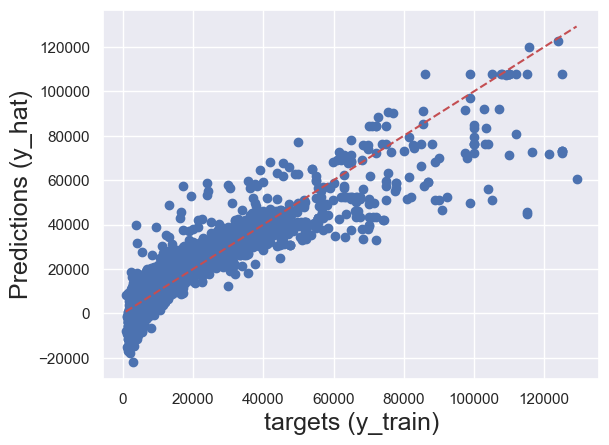

In [262]:
plt.scatter(y_train, y_hat)
plt.xlabel('targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect fit')
plt.grid(True)
plt.show()

In [263]:
reg.score(x_train, y_train)

0.8266715636163839

In [237]:
x.shape

(3867, 302)

In [238]:
def adj_r2(x_train,y_train):
    r2 = reg.score(x_train, y_train)
    n = x_train.shape[0]
    p = x_train.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [239]:
adj_r2(x_train,y_train)

0.8079098475633903

Text(0.5, 1.0, 'Residuals PDF')

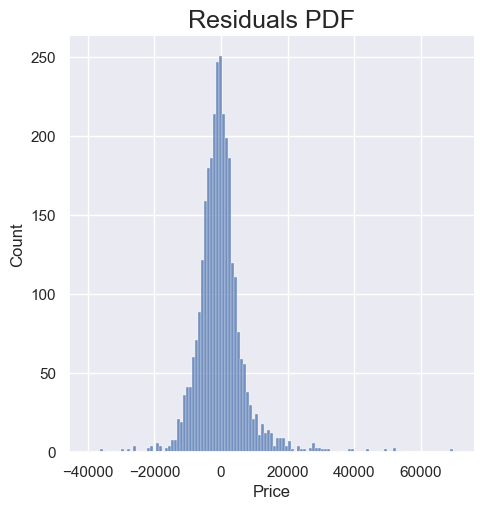

In [240]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [241]:
reg.intercept_

7575661438635256.0

In [242]:
reg.coef_

array([-3.58573785e+03, -1.31503307e+03,  7.13061418e+03, -4.94318168e+02,
       -6.10301603e+02, -1.93693472e+03, -1.44895915e+03, -1.01575724e+03,
       -1.47978944e+03, -3.36160276e+02, -1.82876761e+03,  1.94140186e+03,
        1.51158593e+03, -3.23310913e+16,  4.02324208e+01,  2.62549448e+02,
       -1.90192284e+02,  3.39751134e+02,  8.57623436e+02,  5.72301018e+02,
        2.45754038e+02,  3.18600977e+02,  5.68384230e+02,  5.76247560e+02,
        3.06963974e+02,  4.59337944e+02,  5.57030723e+02,  1.22939260e+03,
        1.51054617e+03,  3.59884281e+14,  5.72739062e+02,  7.24594655e+02,
        7.44712283e+02, -7.87178550e+16,  2.23773258e+02,  4.97308670e+01,
        1.25457791e+16,  3.72857445e+02,  5.34240017e+02,  2.41845811e+03,
        7.84572168e+02, -2.24502969e+16,  1.94532715e+03,  1.10501224e+03,
        1.70706804e+03,  1.21661353e+03,  9.83701825e+02,  1.09246272e+16,
        1.35322613e+03,  1.13844417e+03,  1.12092158e+02,  2.02315314e+03,
        3.85360277e+02,  

In [243]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-3585.737849
1,EngineV,-1315.033074
2,Year,7130.614183
3,Body_hatch,-494.318168
4,Body_other,-610.301603
...,...,...
297,Model_X6,3022.761716
298,Model_X6 M,1382.143318
299,Model_Yaris,-201.900302
300,Model_Z3,162.869040


In [244]:
data_cleaned['Model'].unique()

array(['320', 'Sprinter 212', 'S 500', 'Q7', 'Rav 4', 'A6', 'Megane',
       'Golf IV', '19', 'A6 Allroad', 'Passat B6', 'Land Cruiser 100',
       'Clio', '318', 'Hilux', 'Polo', 'Outlander', 'A8', 'Touareg',
       'Vito', 'Colt', '100', 'Z4', 'Pajero Wagon', 'X5', 'Caddy',
       'Camry', '528', 'TT', 'G 55 AMG', 'X6', '525', 'Kangoo', 'ML 350',
       '730', 'Trafic', 'S 350', 'Lancer', 'E-Class', 'Scenic', '330',
       'Passat B5', 'A3', 'Land Cruiser Prado', 'Caravelle', 'Avensis',
       'GL 320', 'GL 450', 'Lancer X', '200', '520', 'Tiguan',
       'Outlander XL', 'GLS 350', 'A5', 'X6 M', 'Golf III', 'A 150',
       'FJ Cruiser', 'Koleos', 'Passat B7', 'Scirocco', 'M5', 'Venza',
       'V 250', 'ML 270', 'C-Class', 'Lupo', '5 Series', 'CLA 200',
       'T5 (Transporter)', 'Highlander', 'Corolla', 'Galant', 'CLK 240',
       'I3', 'Land Cruiser 200', 'Multivan', 'Vaneo', 'X1',
       'T5 (Transporter) ', 'S 400', 'S 550', 'Passat CC', 'A4 Allroad',
       'Passat B4', 'Golf II'

In [245]:
y_hat_test = reg.predict(x_test)

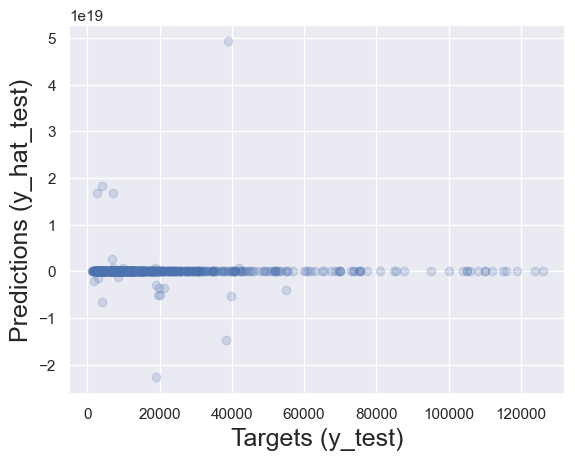

In [246]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [247]:
print(selected_features.shape)

(110,)


In [248]:
print(np.any(x_scaled != 0))

True


In [195]:
print((x_scaled == 0).sum(axis=1))

[0 0 0 ... 0 0 0]


In [249]:
len(x_test) == len(y_test) == len(y_hat)

False

In [ ]:
# Something is not right. 